In [53]:
import numpy as np
import matplotlib.pyplot as plt
 
# creating data
mean = np.array([5.0, 6.0])
cov = np.array([[1.0, 0.95], [0.95, 1.2]])
data = np.random.multivariate_normal(mean, cov, 8000)

# print(data)
# visualising data
# plt.scatter(data[:500, 0], data[:500, 1], marker='.')
# plt.show()
 
# train-test-split
data = np.hstack((np.ones((data.shape[0], 1)), data))
# print(data)
 
split_factor = 0.90
split = int(split_factor * data.shape[0])
 
X_train = data[:split, :-1]
y_train = data[:split, -1].reshape((-1, 1))
X_test = data[split:, :-1]
y_test = data[split:, -1].reshape((-1, 1))
 


In [54]:
# linear regression using "mini-batch" gradient descent
# function to compute hypothesis / predictions


def hypothesis(X, theta):
	return np.dot(X, theta)

# function to compute gradient of error function w.r.t. theta

# 1
def gradient(X, y, theta):
	h = hypothesis(X, theta)
	grad = np.dot(X.transpose(), (h - y))
	return grad

# 2
def grad_a(x,theta1,theta2,y):
    h = hypothesis(x,thetha1,theta2)
    grad = 2*x*(h-y)
    return grad.mean()
def grad_b(x,theta1,theta2,y):
    h = hypothesis(x,thetha1,theta2)
    grad = 2*(h-y)
    return grad.mean()


# function to compute the error for current values of theta


def cost(X, y, theta):
	h = hypothesis(X, theta)
	J = np.dot((h - y).transpose(), (h - y))
	J /= 2
	return J[0]

# function to create a list containing mini-batches


def create_mini_batches(X, y, batch_size):
	mini_batches = []
	data = np.hstack((X, y))
	np.random.shuffle(data)
	n_minibatches = data.shape[0] // batch_size
	i = 0

	for i in range(n_minibatches + 1):
		mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
		X_mini = mini_batch[:, :-1]
		Y_mini = mini_batch[:, -1].reshape((-1, 1))
		mini_batches.append((X_mini, Y_mini))
	if data.shape[0] % batch_size != 0:
		mini_batch = data[i * batch_size:data.shape[0]]
		X_mini = mini_batch[:, :-1]
		Y_mini = mini_batch[:, -1].reshape((-1, 1))
		mini_batches.append((X_mini, Y_mini))
	return mini_batches

# function to perform mini-batch gradient descent


def gradientDescent(X, y, learning_rate=0.001, batch_size=32):
	theta = np.zeros((X.shape[1], 1))
	error_list = []
	max_iters = 3
	for itr in range(max_iters):
		mini_batches = create_mini_batches(X, y, batch_size)
		for mini_batch in mini_batches:
			X_mini, y_mini = mini_batch
			theta = theta - learning_rate * gradient(X_mini, y_mini, theta)
			error_list.append(cost(X_mini, y_mini, theta))

	return theta, error_list


In [70]:
theta = np.zeros((X_train.shape[1], 1))
print(theta)
print(gradient(X_train,y_train,theta))

[[0.]
 [0.]]
[[ -43214.70602465]
 [-223019.1380195 ]]


Bias =  [0.77346811]
Coefficients =  [[1.05375098]]
[[0.77346811]
 [1.05375098]]


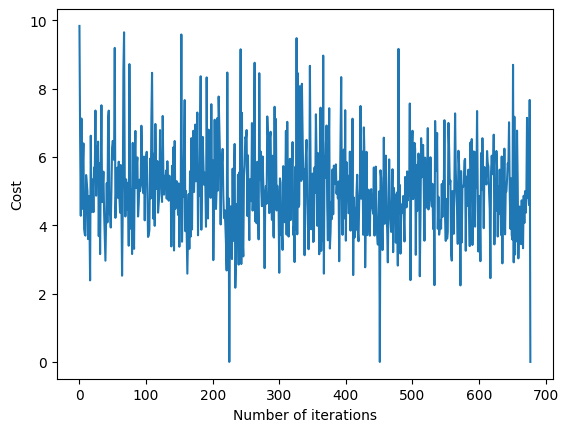

In [56]:
theta, error_list = gradientDescent(X_train, y_train)
print("Bias = ", theta[0])
print("Coefficients = ", theta[1:])
print(theta)

# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()


In [75]:
theta = np.ones((2,1))
print(np.dot(X_train.transpose(),hypothesis(X_train,theta)))
gradient(X_train,y_train,theta)

[[ 43230.37386978]
 [223428.3724539 ]]


array([[ 15.66784513],
       [409.2344344 ]])

In [79]:
def hypo(x,theta):
    return np.dot(x,theta)

In [102]:
a = np.array([1,5,9,8,1])
y = np.array([3,4,5,6,7]).reshape(-1,1)
# print(a)
# print(a.reshape(-1,1))
a = a.reshape(-1,1)
print(np.ones((a.shape[0],1)))
x = np.hstack((np.ones((a.shape[0],1)),a))
print(x.shape)
# y = hypo(a,theta)
print(x.shape)
h = hypo(x,theta)
print(np.dot(x.transpose(),(y-h)))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
(5, 2)
(5, 2)
[[ -4.]
 [-73.]]


In [99]:
print(y_train.shape)

(7200, 1)


In [59]:
np.dot(a,b)

array([10.])